## K-Means Clustering

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[-8.37519301,  5.27584867],
       [ 8.74437854, -2.68493664],
       [ 6.98740327, -4.52797768],
       ...,
       [ 7.40702615, -3.35424404],
       [ 6.22036428, -5.41272647],
       [-8.60743468,  3.90875127]])

In [4]:
y

array([2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0,
       2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1,
       2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2,
       0, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1,
       1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1,
       1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2,
       1, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0,

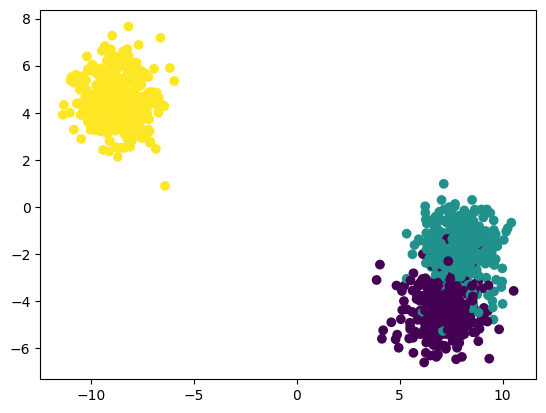

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

## Standarization - Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.33, random_state=42)

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K-Means

In [9]:
from sklearn.cluster import KMeans

In [10]:
## Elbow Method - To select the K value
wcss =[]

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

wcss

[660.0,
 46.1029170056844,
 24.431125905746736,
 17.82498379739149,
 13.470550893007527,
 11.722149428059376,
 9.654910648781879,
 9.979813630250291,
 8.192226038102422,
 7.7045643286590915]

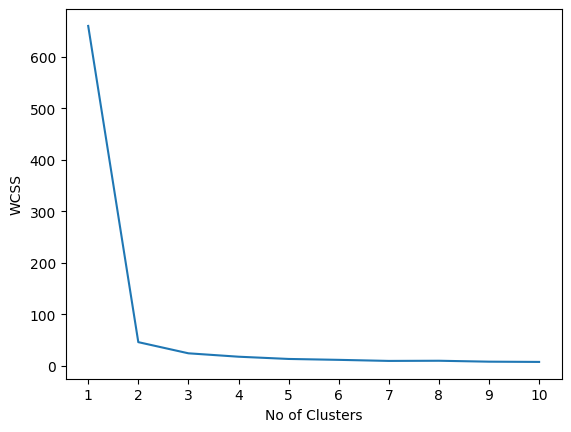

In [11]:
## Plotting Elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
## From above Elbow graph - Selecting 3 as a number of cluster
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [13]:
y_pred = kmeans.predict(X_test_scaled)

In [14]:
y_pred

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1,
       1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2,
       0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 2,
       0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0,

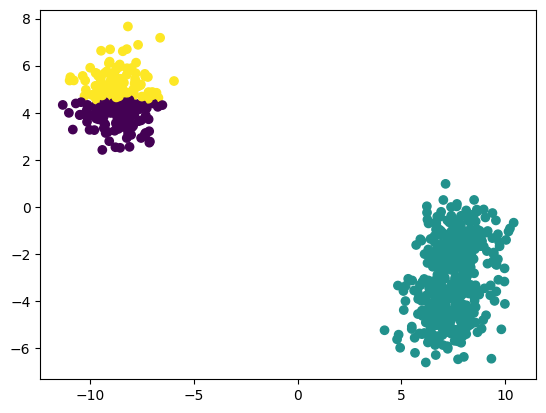

In [15]:
plt.scatter(X_test[:, 0], X_test[:, 1], c= y_pred)

## Validating the K-Value

In [20]:
## 2. Silhouette Score 
from sklearn.metrics import silhouette_score 
silhouette_coefficient = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficient.append(score)

In [21]:
silhouette_coefficient

[np.float64(0.8404080141971532),
 np.float64(0.6347989330004982),
 np.float64(0.4934294874615343),
 np.float64(0.42610488613764863),
 np.float64(0.41053177377641586),
 np.float64(0.3904873208153491),
 np.float64(0.3637792595236328),
 np.float64(0.3458018632818979),
 np.float64(0.345706999287657)]

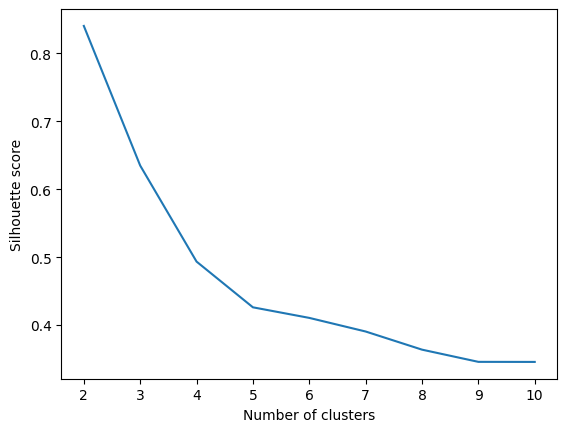

In [23]:
## Plotting Silhoutte score 
plt.plot(range(2,11), silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()